<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [975]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np

# range_date
rd = pd.date_range(start ='1/1/2025', end ='2/1/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-31 15:00:00', '2025-01-31 16:00:00',
               '2025-01-31 17:00:00', '2025-01-31 18:00:00',
               '2025-01-31 19:00:00', '2025-01-31 20:00:00',
               '2025-01-31 21:00:00', '2025-01-31 22:00:00',
               '2025-01-31 23:00:00', '2025-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='h')
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
745


In [976]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

,data
datetime,
2025-01-31 20:00:00,44
2025-01-31 21:00:00,16
2025-01-31 22:00:00,81
2025-01-31 23:00:00,2
2025-02-01 00:00:00,5


In [977]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-31']
print(filtered_df)


                     data
datetime                 
2025-01-31 00:00:00    38
2025-01-31 01:00:00    39
2025-01-31 02:00:00     2
2025-01-31 03:00:00    31
2025-01-31 04:00:00    74
2025-01-31 05:00:00     3
2025-01-31 06:00:00    74
2025-01-31 07:00:00    31
2025-01-31 08:00:00    18
2025-01-31 09:00:00    79
2025-01-31 10:00:00    99
2025-01-31 11:00:00    84
2025-01-31 12:00:00    19
2025-01-31 13:00:00    86
2025-01-31 14:00:00    29
2025-01-31 15:00:00    61
2025-01-31 16:00:00    18
2025-01-31 17:00:00    61
2025-01-31 18:00:00    47
2025-01-31 19:00:00    56
2025-01-31 20:00:00    44
2025-01-31 21:00:00    16
2025-01-31 22:00:00    81
2025-01-31 23:00:00     2




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Series de tiempo

In [978]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Leer el dataset desde el github.

In [979]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


### 2. Definir como indice la columna time.

In [980]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


### 3. Obtenga información del data frame.

In [981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


### 4. Determine si hay null, nan en el data frame.

In [982]:
df.isna().sum()

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

### 5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [983]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'tick_volume', 'spread',
       'real_volume', 'MeanCloseOpen', 'Diff_Close', 'Diff_Open',
       'Diff_MeanCloseOpen'],
      dtype='object')

In [984]:
def pascal_case(s):
    return ''.join(word.capitalize() for word in s.split('_'))
df.columns = [pascal_case(col) for col in df.columns]
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread',
       'RealVolume', 'Meancloseopen', 'DiffClose', 'DiffOpen',
       'DiffMeancloseopen'],
      dtype='object')

### 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:


- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

In [985]:
DiffPrice = df['Close'] - df['Open']
df['DiffPrice'] = DiffPrice
new_df = df[['Close', 'DiffPrice']]
new_df

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,-0.00082
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00154
2022-07-25 16:00:00,1.02485,0.00031
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00030
2023-05-12 21:00:00,1.08531,-0.00015


- Para la nueva columna construya un histograma de los datos.

array([[<Axes: title={'center': 'DiffPrice'}>]], dtype=object)

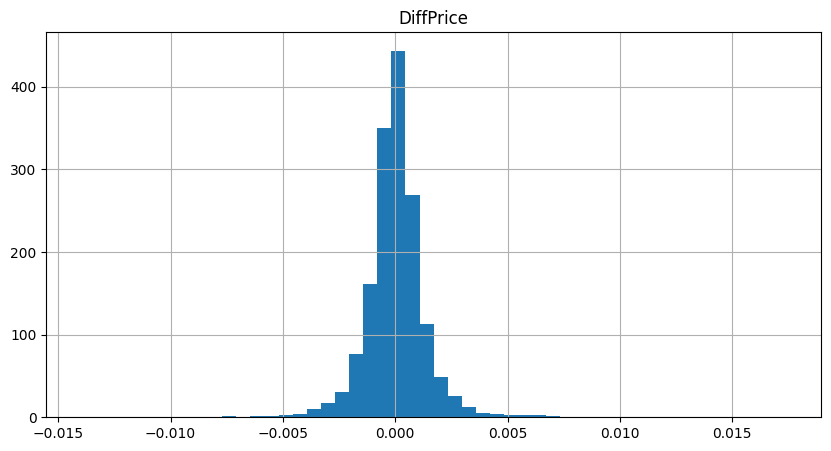

In [986]:
df.hist(column='DiffPrice', bins=50, figsize=(10, 5), density=True)

- Determine la mejor distribucion estadística que se ajusta al histograma anterior

2025-05-13 20:42:17.546 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=108519.319553)
2025-05-13 20:42:18.018 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=108464.513883)
2025-05-13 20:42:18.150 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=929279.248348)
2025-05-13 20:42:18.330 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=108309.412101)
2025-05-13 20:42:18.460 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=925204.445267)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,108309.412101,3136.479488,3156.031068,inf,0.091281,1.052957e-36
beta,108464.513883,3223.215830,3249.284603,inf,0.090484,4.513221e-36
norm,108519.319553,3243.442992,3256.477378,inf,0.090265,6.704773e-36
burr,925204.445267,-365.766660,-339.697888,inf,0.609636,0.000000e+00
gamma,929279.248348,-371.149726,-351.598146,inf,0.591681,0.000000e+00


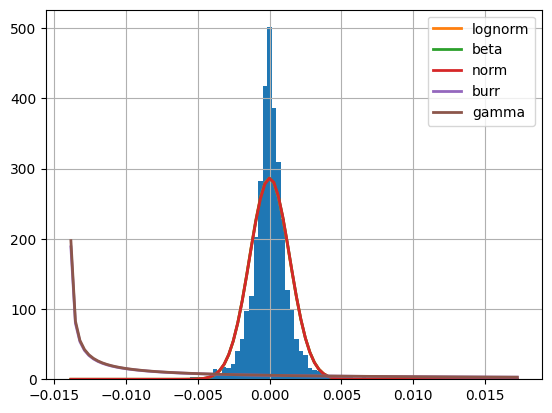

In [987]:
from fitter import Fitter
from joblib import parallel_backend

f = Fitter(new_df['DiffPrice'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
# "threading" backend: todo corre en hilos dentro del mismo proceso
with parallel_backend('threading'):
    f.fit()
f.summary()


In [988]:
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')


{'lognorm': {'s': 0.009125998218615775,
  'loc': -0.15255143544639838,
  'scale': 0.15255946689128097}}

In [989]:
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

(15038.718992544693,
 27945.87367589133,
 -0.21182640715901585,
 0.6054964817112847)

### 7. Para el data frame, seleccionemos solo los datos del 2023.

In [990]:
new_df = new_df.loc[new_df.index.year == 2023]
new_df

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00202
2023-01-02 01:00:00,1.06965,0.00118
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00015
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00030
2023-05-12 21:00:00,1.08531,-0.00015


### 8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

In [991]:
days15_mean = new_df.groupby(pd.Grouper(freq='15D')).mean()
days15_mean

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000048
2023-01-17,1.085565,0.000013
2023-02-01,1.077679,-0.000055
2023-02-16,1.063150,-0.000037
2023-03-03,1.063186,0.000011
2023-03-18,1.080936,0.000066
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000001
2023-05-02,1.098889,-0.000060


In [992]:
new_df.resample('15D').mean()

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000048
2023-01-17,1.085565,0.000013
2023-02-01,1.077679,-0.000055
2023-02-16,1.063150,-0.000037
2023-03-03,1.063186,0.000011
2023-03-18,1.080936,0.000066
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000001
2023-05-02,1.098889,-0.000060


In [993]:
weekly_mean = new_df.resample('W').mean()
weekly_mean   

,Close,DiffPrice
time,,
2023-01-08,1.059972,-5.375000e-05
2023-01-15,1.076002,1.646667e-04
2023-01-22,1.082041,1.991667e-05
2023-01-29,1.088414,3.500000e-06
2023-02-05,1.089281,-3.483333e-05
2023-02-12,1.073363,-9.025000e-05
2023-02-19,1.069648,8.000000e-06
2023-02-26,1.063374,-1.210000e-04
2023-03-05,1.060854,6.783333e-05


In [994]:
monthly_mean = new_df.resample('ME').mean()
monthly_mean

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000054
2023-03-31,1.070874,0.000037
2023-04-30,1.096051,0.000040
2023-05-31,1.098980,-0.000071


### 9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.

In [995]:
monthly = new_df.resample('ME')
monthly

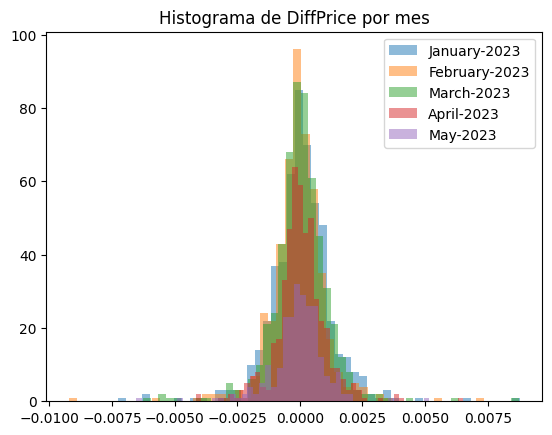

In [996]:
for month, data in monthly:
    label = month.strftime('%B-%Y')
    plt.hist(data['DiffPrice'], bins=50, alpha=0.5, label=label)
plt.title('Histograma de DiffPrice por mes')
plt.legend()
plt.show()


# Análisis de datos con pandas.

### 1. Leer los datos desde una página web.

In [997]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### 2. Renombrar las columnas en formato PascalCase.

In [998]:
data.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [999]:
data.columns = [pascal_case(col) for col in data.columns]
data.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')

### 3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [1000]:
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [1001]:
data.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [1002]:
data.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1003]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

### 4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [1004]:
data.isna().sum()

Id                   0
Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Diagnosis            0
dtype: int64

No hay datos nulos, pero nsi hubiera propondria eliminarlos del data set y no tenerlos en cuenta dado que esta es informacion sensible y llenarlos por ejemplo con la media podria sesgar los resultados del analisis.

### 5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [1005]:
for el in ['target', 'Target']:
    print(el in data.columns)

False
False


In [1006]:
data.Diagnosis.unique()

array(['M', 'B'], dtype=object)

### 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

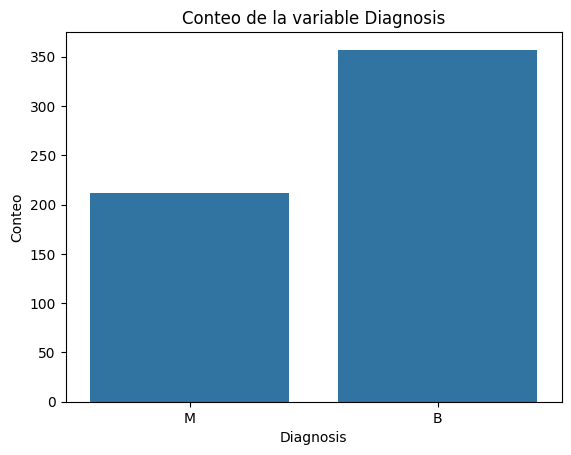

In [1007]:
import seaborn as sns
sns.countplot(data=data, x='Diagnosis')
plt.title('Conteo de la variable Diagnosis')
plt.ylabel('Conteo')
plt.xlabel('Diagnosis')
plt.show()

In [1008]:
data.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

### 7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [1009]:
data['DiagnosisNum'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNum
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1


### 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [1010]:
num_cols = data.select_dtypes(include=[np.number]).columns[ 1:]
num_cols

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'DiagnosisNum'],
      dtype='object')

In [1011]:
num = data[num_cols]

means = num.mean()
stds = num.std()

data[num_cols] = (num - means) / stds
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNum
0,842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1.296535
1,842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1.296535
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1.296535
3,84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1.296535
4,84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1.296535


### 9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [1012]:
data.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis', 'DiagnosisNum'],
      dtype='object')

In [1013]:
lista =['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
params = [item.replace('Mean', '') for item in lista]
params

['Radius',
 'Texture',
 'Perimeter',
 'Area',
 'Smoothness',
 'Compactness',
 'Concavity',
 'ConcavePoints',
 'Symmetry',
 'FractalDimension']

In [1014]:
for i, param in enumerate(params):
    group = data.columns[data.columns.str.startswith(param)]
    mean = data[group].mean(axis=1)
    data[lista[i]] = mean
data.loc[:,lista].head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


### 10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

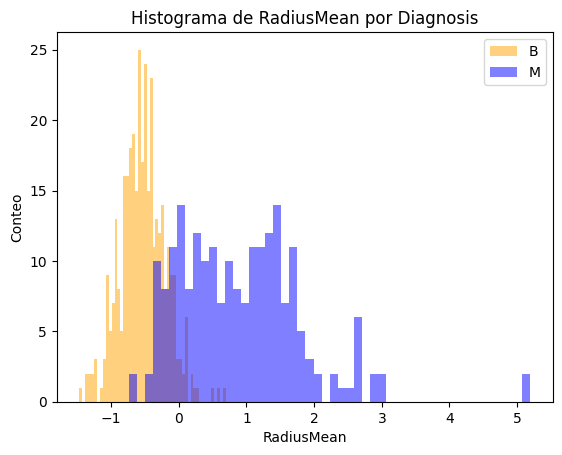

In [1015]:
colors = {'B': 'orange', 'M': 'blue'}

for diag, subset in data.groupby('Diagnosis'):
    plt.hist(subset['RadiusMean'], bins=50, alpha=0.5, color=colors[diag], label=diag)
plt.title('Histograma de RadiusMean por Diagnosis')
plt.ylabel('Conteo')
plt.xlabel('RadiusMean')
plt.legend()
plt.show()

### 11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

In [1016]:
import re
obj = """- `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`"""
vars = re.findall(r'`([^`]+)`', obj)
vars

['RadiusMean',
 'TextureMean',
 'PerimeterMean',
 'AreaMean',
 'SmoothnessMean',
 'CompactnessMean',
 'ConcavityMean',
 'ConcavePointsMean',
 'Symmetry3',
 'FractalDimension3']

In [1017]:
melted = pd.melt(data, id_vars=['Diagnosis'], value_vars=vars, var_name='Feature', value_name='Value')
melted


,Diagnosis,Feature,Value
0,M,RadiusMean,1.822892
1,M,RadiusMean,1.377122
2,M,RadiusMean,1.438879
3,M,RadiusMean,-0.241121
4,M,RadiusMean,1.438539
...,...,...,...
5685,M,FractalDimension3,-0.708467
5686,M,FractalDimension3,-0.973122
5687,M,FractalDimension3,-0.318129
5688,M,FractalDimension3,2.217684


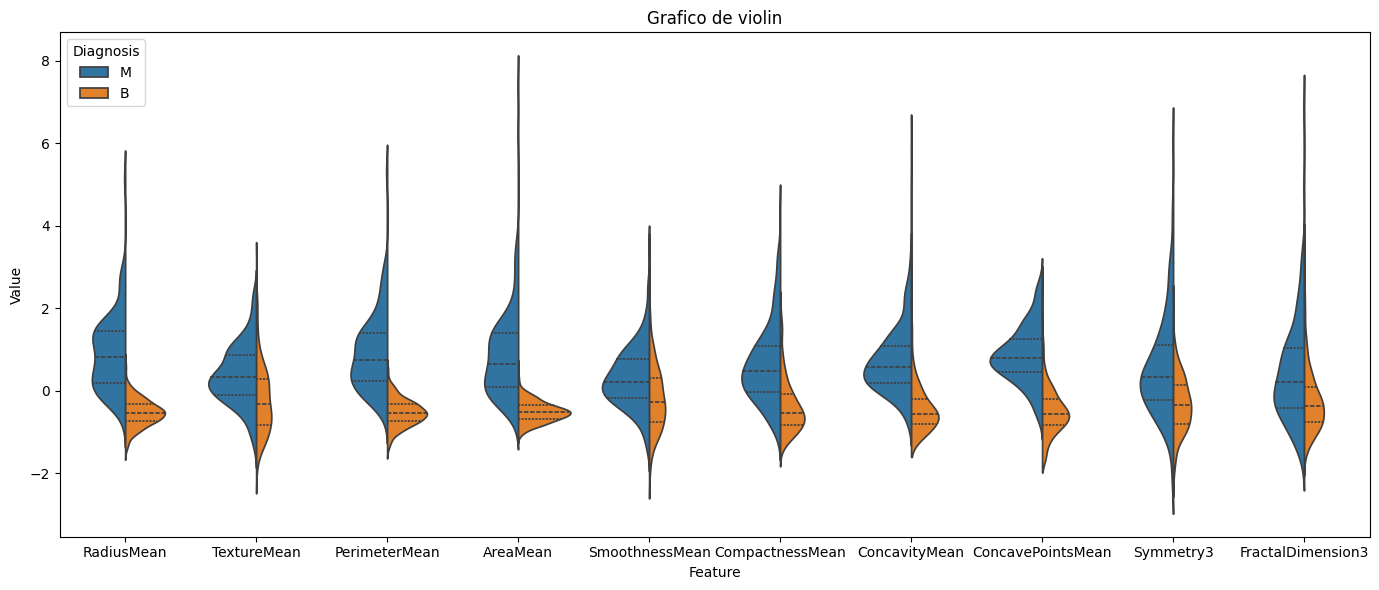

In [1018]:
fig = plt.figure(figsize=(14, 6))
sns.violinplot(x='Feature', y='Value', hue='Diagnosis', data=melted, split=True, inner='quartile')
plt.title('Grafico de violin')
plt.tight_layout()
plt.show()

### 12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python 
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

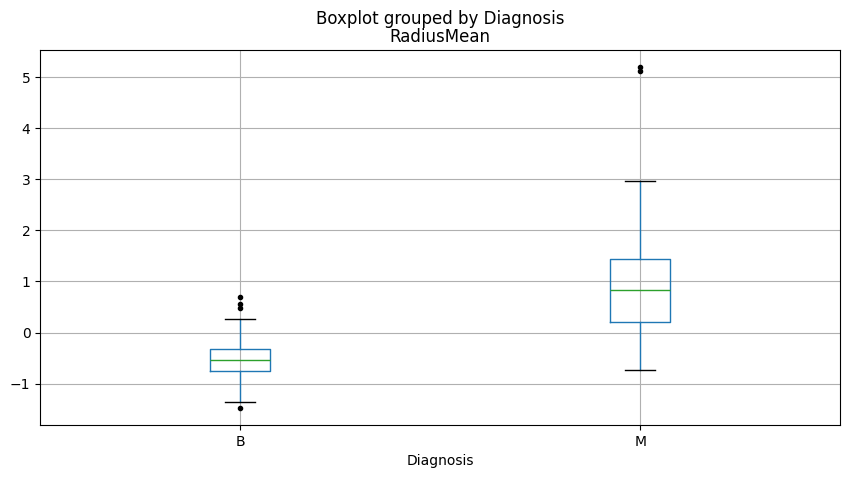

In [1019]:
data.boxplot(column='RadiusMean', by='Diagnosis', sym='k.', figsize=(10, 5))

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

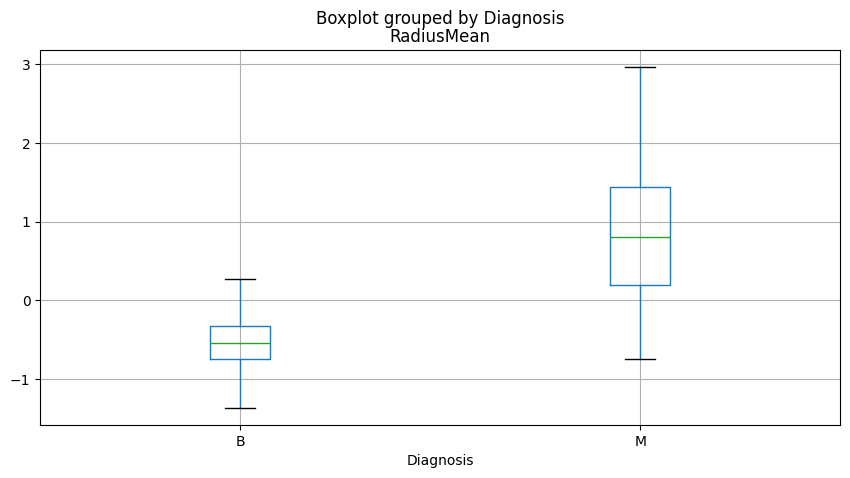

In [1020]:
# Eliminar valores atipicos usando IQR

col = 'RadiusMean'
Q1 = data.groupby('Diagnosis')[col].transform(lambda x: x.quantile(0.25))
Q3 = data.groupby('Diagnosis')[col].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

mask = data[col].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

data = data[mask]

data.boxplot(column='RadiusMean', by='Diagnosis', sym='k.', figsize=(10, 5))


### 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [1021]:
num_cols = data.select_dtypes(include=[np.number]).columns[1:]
data[num_cols].corr()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
Radius1,1.000000,0.324276,0.997759,0.990452,0.172718,0.507371,0.665334,0.818758,0.157234,-0.298503,...,0.954760,0.207851,0.948315,0.950848,0.029145,0.413019,0.501925,0.719460,0.091365,-0.118811
Texture1,0.324276,1.000000,0.329799,0.325790,-0.025181,0.231143,0.297045,0.288801,0.065061,-0.073941,...,0.349030,0.907841,0.354995,0.337580,0.024449,0.250880,0.265619,0.271142,0.072225,0.036741
Perimeter1,0.997759,0.329799,1.000000,0.989082,0.210236,0.559582,0.706092,0.848201,0.193316,-0.246953,...,0.958171,0.216739,0.957982,0.952945,0.065923,0.464477,0.543372,0.752546,0.125769,-0.068233
Area1,0.990452,0.325790,0.989082,1.000000,0.175699,0.503880,0.674355,0.823361,0.162511,-0.272231,...,0.961437,0.218993,0.954237,0.971417,0.052390,0.408942,0.506768,0.715862,0.098195,-0.099934
Smoothness1,0.172718,-0.025181,0.210236,0.175699,1.000000,0.662840,0.525881,0.558678,0.559140,0.588321,...,0.250380,0.033205,0.270806,0.223706,0.878032,0.533905,0.443504,0.541111,0.466094,0.521926
Compactness1,0.507371,0.231143,0.559582,0.503880,0.662840,1.000000,0.886953,0.833459,0.605872,0.575577,...,0.562714,0.206853,0.623000,0.532936,0.563686,0.947461,0.828841,0.849677,0.545988,0.668156
Concavity1,0.665334,0.297045,0.706092,0.674355,0.525881,0.886953,1.000000,0.918645,0.510340,0.359324,...,0.709048,0.267288,0.750002,0.691441,0.445117,0.846894,0.942714,0.915489,0.448840,0.509509
ConcavePoints1,0.818758,0.288801,0.848201,0.823361,0.558678,0.833459,0.918645,1.000000,0.472053,0.184624,...,0.848812,0.239481,0.873253,0.831272,0.430484,0.727796,0.768604,0.938256,0.385234,0.312863
Symmetry1,0.157234,0.065061,0.193316,0.162511,0.559140,0.605872,0.510340,0.472053,1.000000,0.482145,...,0.246227,0.109584,0.275859,0.213440,0.482624,0.547313,0.470969,0.483666,0.872784,0.474848
FractalDimension1,-0.298503,-0.073941,-0.246953,-0.272231,0.588321,0.575577,0.359324,0.184624,0.482145,1.000000,...,-0.189060,0.017025,-0.134641,-0.202253,0.616283,0.584567,0.429583,0.269916,0.468679,0.924778


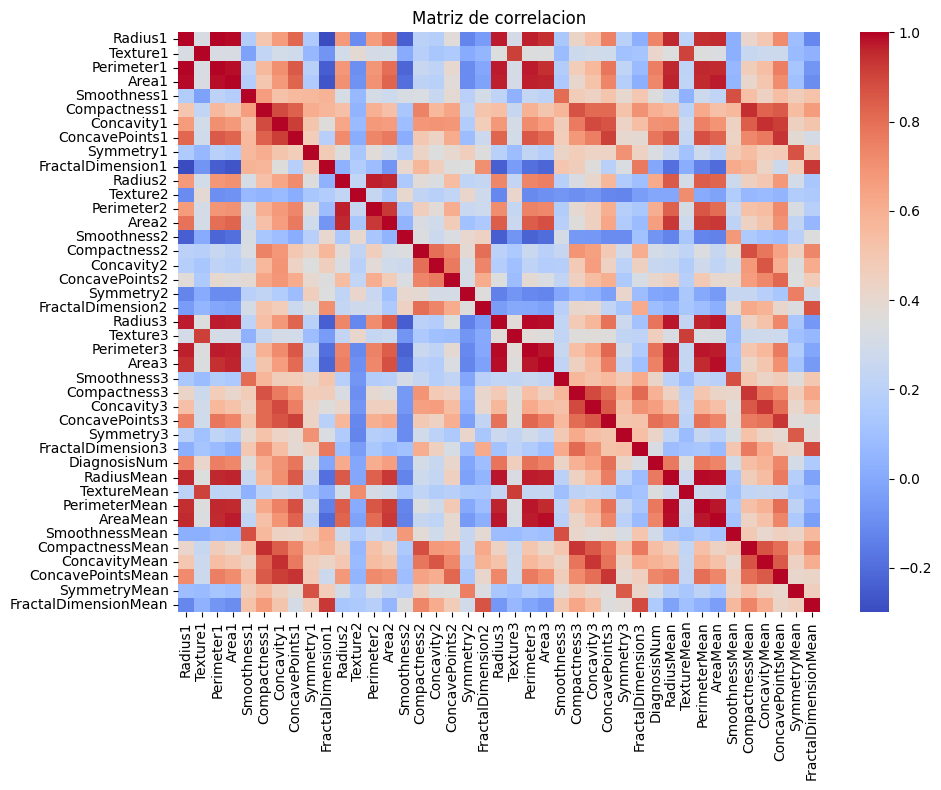

In [1022]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()

### 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Puede utilizarse graficas pairplot con las cuales es posible visualizar las relaciones entre parejas de variables que componen el dataset.

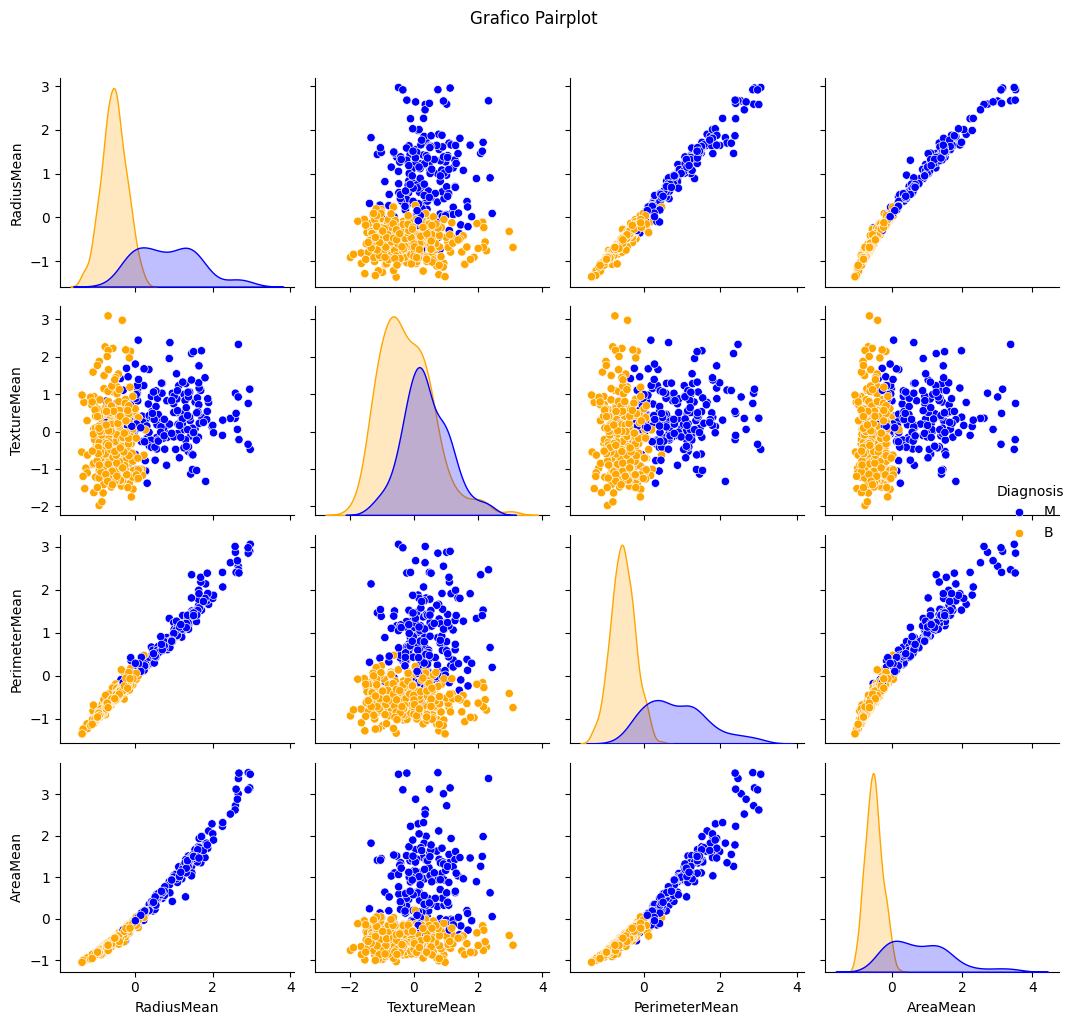

In [1033]:
features = ['RadiusMean','TextureMean','PerimeterMean','AreaMean']
sns.pairplot(data[features + ['Diagnosis']], hue='Diagnosis', palette={'B':'orange','M':'blue'}, diag_kind='kde')
plt.suptitle('Grafico Pairplot', y=1.02)
plt.tight_layout()
plt.show()
